In [3]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

پرسش شبیه سازی 1

In [39]:
n = 1000
m = 3000
p = 0.0034
graph_length = lambda : len(nx.fast_gnp_random_graph(n,p).edges)
X = np.array([graph_length() for i in range(0,10)])
E = np.mean(X)
E

1705.0

پرسش شبیه سازی 2

In [4]:
n=1000
p=0.00016
socis=0 #sum of social people
y=[0]*n #number of people with same friends number in 10 simulation
for i in range (0,10):
    s=0 #sum of graph degrees
    G=nx.generators.random_graphs.binomial_graph(n,p)
    for j in G.nodes:
        s+=G.degree[j]
        for k in range (0,n):
            if(G.degree[j]==k):
                y[k]+=1
    L=s/n #average of a perosn's friends
    soci=0 #social people
    for l in G.nodes:
        if(G.degree[l]>L):
            soci+=1
    socis+=soci
print(socis/10) #mean of social people from 10 simulation

149.1


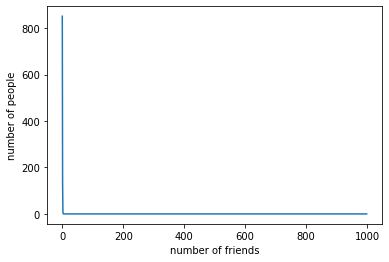

In [5]:
for i in range (0,1000):
    y[i]/=10 #mean number of people with same friends number
plt.figure()
plt.plot(y)
plt.xlabel("number of friends")
plt.ylabel("number of people")
plt.show()

پرسش شبیه سازی 3

In [17]:
n = 3000
p = 0.01
def simulation3 (n,p) :
    path = 0
    cyc = 0
    G = nx.fast_gnp_random_graph(n,p)
    for i in range(0,n):
        path = path + nx.degree(G,i)*(nx.degree(G,i)-1)/2
    for i in range(0,n):
        help1 = np.array(sorted([key for key in (G[i])]))
        help1 = help1[help1>i]
        for j in help1:
            help2 = np.array(sorted([key for key in (G[j])]))
            help2 = help2[help2>j]
            for k in help2:
                if i in G[k] :
                    cyc = cyc+1
    return [path-3*cyc,cyc]
test = np.array([simulation3(n,p) for i in range(0,5)])
Ep = np.mean(test[:,0])
Ec = np.mean(test[:,1])
[Ep,Ec]

[1337257.6, 4482.4]

پرسش شبیه سازی 4

In [16]:
p = 0.4
test = np.array([simulation3(n,p) for i in range(0,5)])
Ep = np.mean(test[:,0])
Ec = np.mean(test[:,1])
[Ep,Ec]

[1295869181.2, 288313060.2]

پرسش شبیه سازی 5

In [47]:
n = 1000
p = 0.003
G = nx.fast_gnp_random_graph(n,p)
sum = 0
for i in range(0,n):
    neighbor = np.array([key for key in G[i]])
    sum += G.subgraph(neighbor).number_of_edges()
friend_relation = sum*2/n
friend_relation

0.024

پرسش شبیه سازی 6

In [8]:
n=1000
p=0.0033
G=nx.generators.random_graphs.binomial_graph(n,p)
s=0 #sum of distances
m=0 #number of pair people who have path between them
for i in range (1,n):
    for j in range (0,n-1):
        if(i>j):
            try:
                s+=nx.shortest_path_length(G,i,j)
                m+=1 
            except nx.NetworkXNoPath:
                pass
print(s/m)

5.8569071244908235


پرسش شبیه سازی 7

In [5]:
n=50
p=0.34
d=0  #sum of maximum distance
for i in range (0,100):
    G=nx.generators.random_graphs.binomial_graph(n,p)
    max=0   #maximum distance
    l=[0,0] #indexes of two person with maximum distance
    for j in range (1,n):
        for k in range (0,n-1):
            if(j>k):
                try:
                    l=[k,j] if max<nx.shortest_path_length(G,j,k) else l
                    max=nx.shortest_path_length(G,j,k) if max<nx.shortest_path_length(G,j,k) else max
                except nx.NetworkXNoPath:
                    pass
    d+=max
print(d/100)

2.75


پرسش شبیه سازی 8

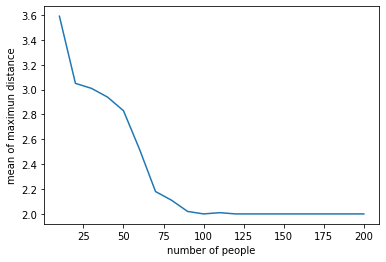

In [6]:
def f(n): #mean of maximum distance in graph as a fucnction of n
    a,d=0,0
    for i in range (0,100):
        G=nx.generators.random_graphs.binomial_graph(n,p)
        max=0
        for j in range (1,n):
            for k in range (0,n-1):
                if(j>k):
                    try:
                        max=nx.shortest_path_length(G,j,k) if max<nx.shortest_path_length(G,j,k) else max
                    except nx.NetworkXNoPath:
                        pass
        d+=max
    return(d/100)
B=[]
x=[10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]
for i in x:
    B.append(f(i))
plt.figure()
plt.plot(x,B)
plt.xlabel("number of people")
plt.ylabel("mean of maximun distance")
plt.show()

پرسش شبیه سازی 9

In [5]:
findCycle = lambda G : np.sum(list(nx.triangles(G).values()))/3
n = 100
p = 0.34
data = np.array([findCycle(nx.fast_gnp_random_graph(n,p)) for i in range (0,100)])
data.mean()


6347.85

پرسش شبیه سازی 10

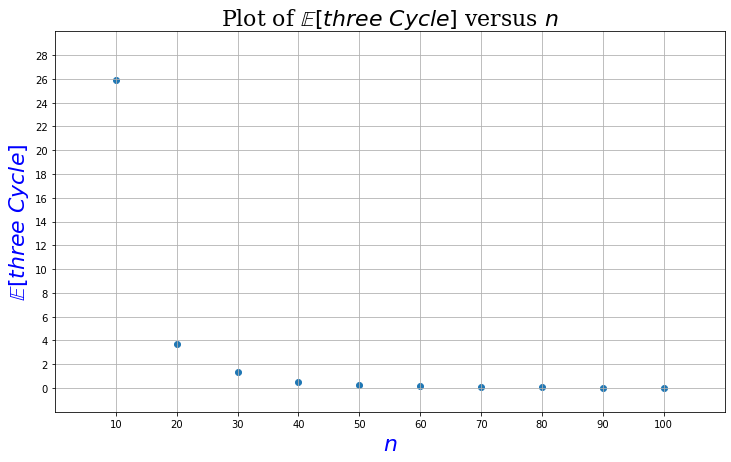

In [85]:
N = np.arange(10,110,10)
P = 60/np.power(N,2)
Data = np.zeros(10)
for i in range(0,10):
    Data[i] = np.array([findCycle(nx.fast_gnp_random_graph(N[i],P[i])) for j in range (0,100)]).mean()
plt.figure(figsize=(12,7))
plt.scatter(N,Data)
plt.title(r"Plot of $\mathbb{E}\left[three\ Cycle\right]$ versus $n$",fontdict={'family':'serif','size':22})
plt.ylabel(r"$\mathbb{E}\left[three\ Cycle\right]$",fontdict={'family':'serif','size':22,'color':'blue'})
plt.xlabel(r"$n$",fontdict={'family':'serif','size':22,'color':'blue'})
plt.xlim([0,110])
plt.ylim([-2,30])
plt.xticks(np.linspace(10,100,10))
plt.yticks(np.linspace(0,28,15))
plt.grid()
plt.show()

پرسش شبیه سازی 11

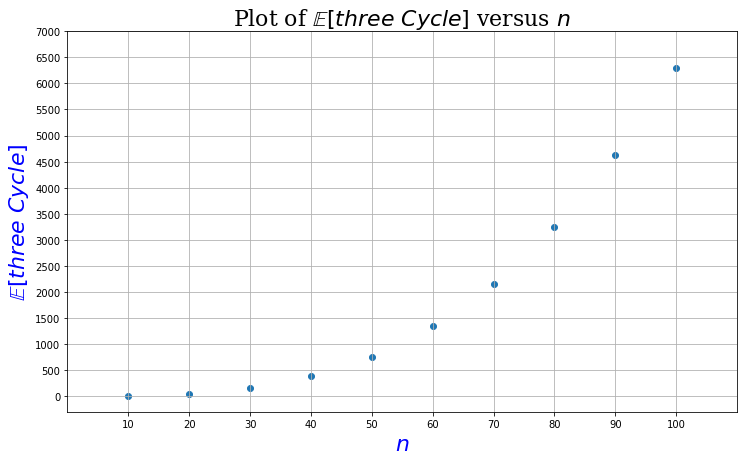

In [7]:
N = np.arange(10,110,10)
p = 0.34
Data = np.zeros(10)
for i in range(0,10):
    Data[i] = np.array([findCycle(nx.fast_gnp_random_graph(N[i],p)) for j in range (0,100)]).mean()
plt.figure(figsize=(12,7))
plt.scatter(N,Data)
plt.title(r"Plot of $\mathbb{E}\left[three\ Cycle\right]$ versus $n$",fontdict={'family':'serif','size':22})
plt.ylabel(r"$\mathbb{E}\left[three\ Cycle\right]$",fontdict={'family':'serif','size':22,'color':'blue'})
plt.xlabel(r"$n$",fontdict={'family':'serif','size':22,'color':'blue'})
plt.xlim([0,110])
plt.ylim([-300,7000])
plt.xticks(np.linspace(10,100,10))
plt.yticks(np.linspace(0,7000,15))
plt.grid()
plt.show()

پرسش شبیه سازی 12

In [18]:
N = np.arange(50,1250,50)
P = 1/np.power(N,1)
Data = np.zeros(24)
for i in range(0,24):
    Data[i] = np.array([findCycle(nx.fast_gnp_random_graph(N[i],P[i])) for j in range (0,100)]).mean()

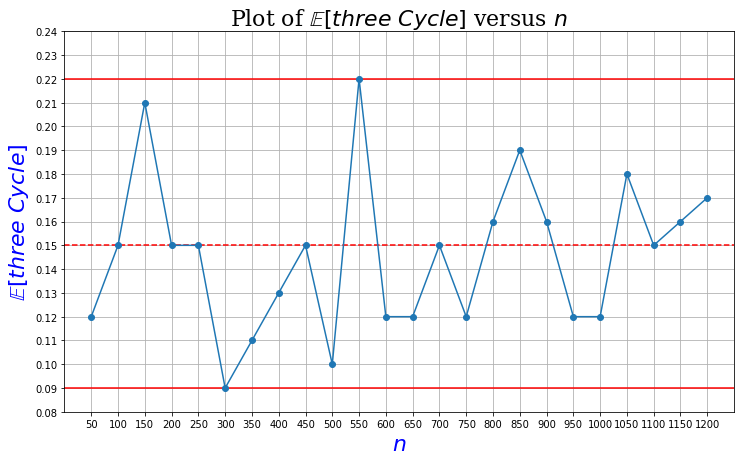

In [22]:
plt.figure(figsize=(12,7))
plt.plot((0,1250),(0.09,0.09),color='r')
plt.plot((0,1250),(0.22,0.22),color='r')
plt.plot((0,1250),(0.15,0.15),color='r',linestyle='--')
plt.plot(N,Data,marker='o')
plt.title(r"Plot of $\mathbb{E}\left[three\ Cycle\right]$ versus $n$",fontdict={'family':'serif','size':22})
plt.ylabel(r"$\mathbb{E}\left[three\ Cycle\right]$",fontdict={'family':'serif','size':22,'color':'blue'})
plt.xlabel(r"$n$",fontdict={'family':'serif','size':22,'color':'blue'})
plt.xlim([0,1250])
plt.ylim([0.08,0.24])
plt.xticks(np.linspace(50,1200,24))
plt.yticks(np.linspace(0.08,0.24,17))
plt.grid()
plt.show()

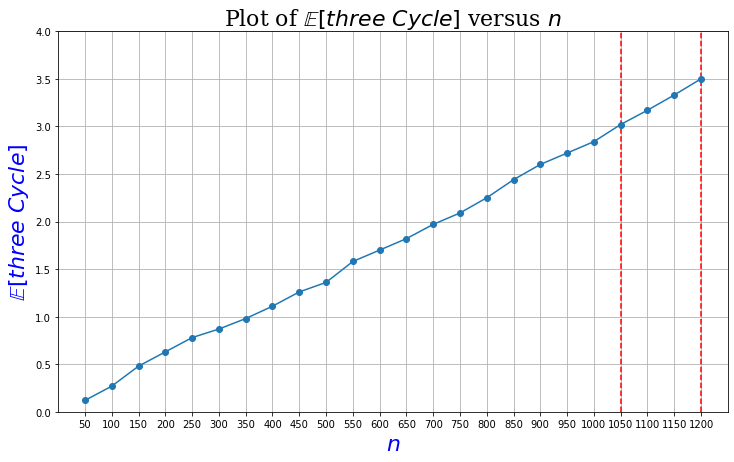

In [30]:
plt.figure(figsize=(12,7))
plt.plot((1050,1050),(0,4),color='r',linestyle='--')
plt.plot((1200,1200),(0,4),color='r',linestyle='--')
plt.plot(N,Data.cumsum(),marker='o')
plt.title(r"Plot of $\mathbb{E}\left[three\ Cycle\right]$ versus $n$",fontdict={'family':'serif','size':22})
plt.ylabel(r"$\mathbb{E}\left[three\ Cycle\right]$",fontdict={'family':'serif','size':22,'color':'blue'})
plt.xlabel(r"$n$",fontdict={'family':'serif','size':22,'color':'blue'})
plt.xlim([0,1250])
plt.ylim([0,4])
plt.xticks(np.linspace(50,1200,24))
plt.yticks(np.linspace(0,4,9))
plt.grid()
plt.show()

پرسش شبیه سازی 13

In [11]:
n=150
p=0.2
t=0 #number of graphs with alone people
d=0 #number of connected graphs
for i in range (0,100):
    G=nx.generators.random_graphs.binomial_graph(n,p)
    t+=bool(list(nx.isolates(G)))
    d+=nx.is_connected(G)
print(f"existence of isolated node: {t/100}\nconnected graph: {d/100}")

existence of isolated node: 0.0
connected graph: 1.0


پرسش شبیه سازی 14

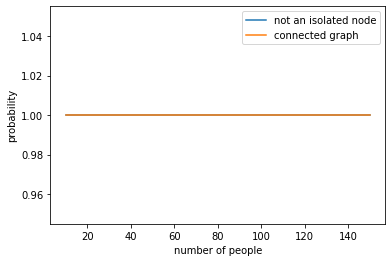

In [2]:
def f(n,p): #number of graphs with alone people
    t=0
    for i in range (0,100):
        G=nx.generators.random_graphs.binomial_graph(n,p)
        t+=bool(list(nx.isolates(G)))
    return 1-t/100

def g(n,p): #number of connected graphs
    d=0
    for i in range (0,100):
        G=nx.generators.random_graphs.binomial_graph(n,p)
        d+=nx.is_connected(G)
    return d/100

n=[10,20,30,40,50,60,70,80,90,100,110,120,130,140,150]
B=[]
C=[]
for i in n:
    B.append(f(i,(4*np.log(i))/i))
for i in n:
    C.append(g(i,(4*np.log(i))/i))
plt.figure()
plt.plot(n,B)
plt.plot(n,C)
plt.legend(["not an isolated node","connected graph"])
plt.xlabel("number of people")
plt.ylabel("probability")
plt.show()

پرسش شبیه سازی 15

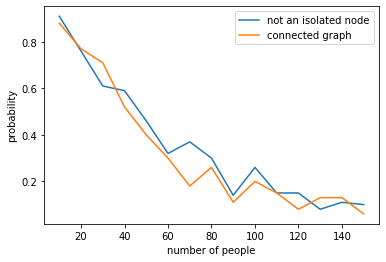

In [3]:
B=[]
C=[]
for i in n:
    B.append(f(i,4/i))
for i in n:
    C.append(g(i,4/i))
plt.plot(n,B)
plt.plot(n,C)
plt.legend(["not an isolated node","connected graph"])
plt.xlabel("number of people")
plt.ylabel("probability")
plt.show()